In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score


## ***Reading data***

In [6]:
df = pd.read_csv('winequality-white.csv', delimiter=';') #without delimiter it assumes comma separated
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# **Visualizing Data**

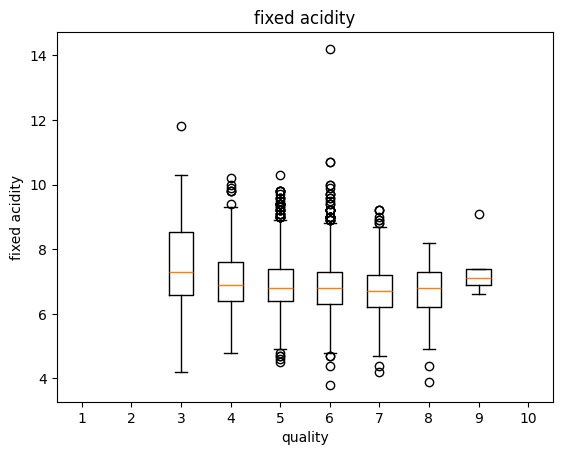

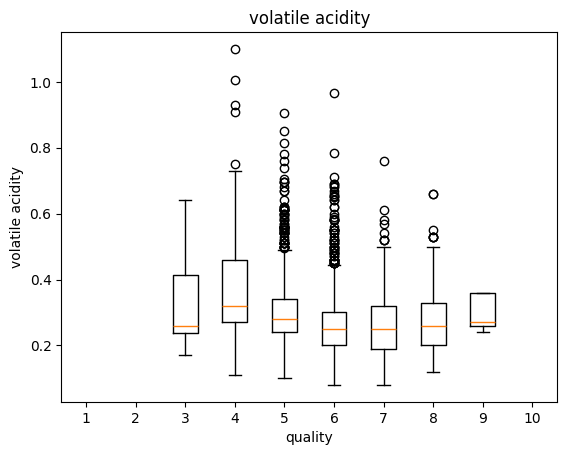

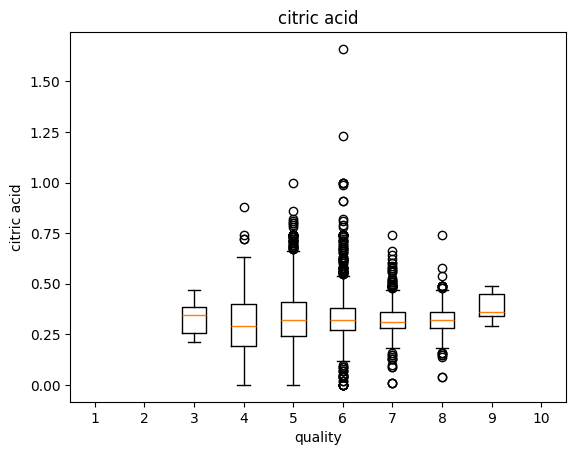

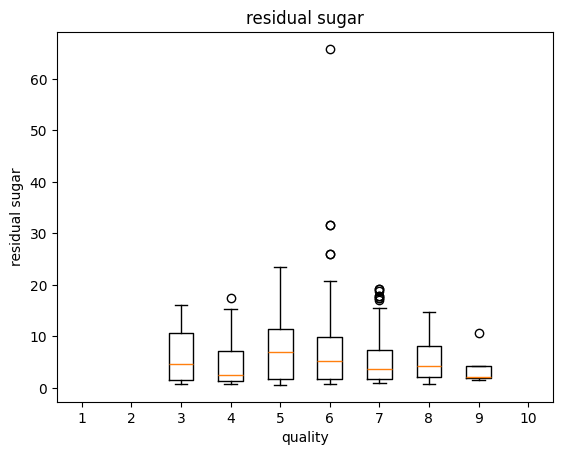

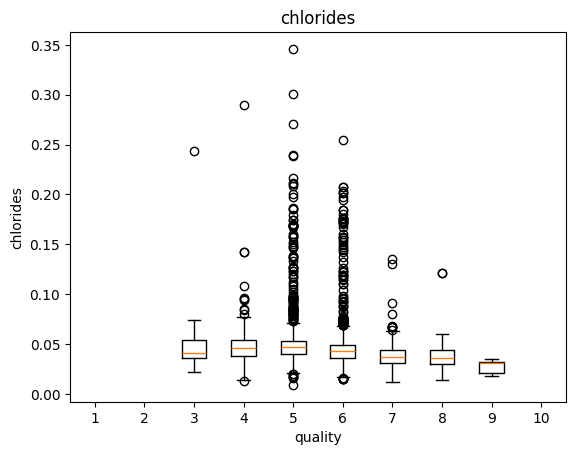

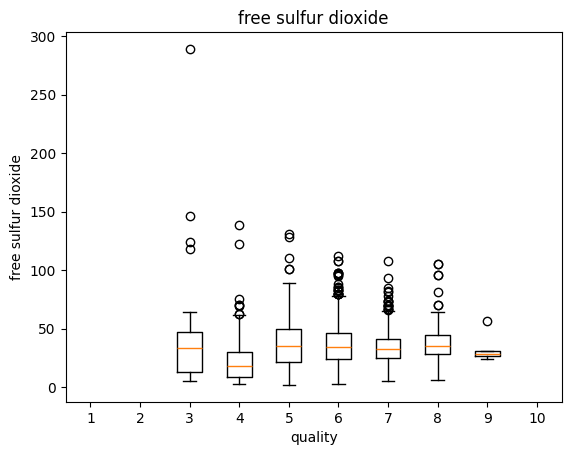

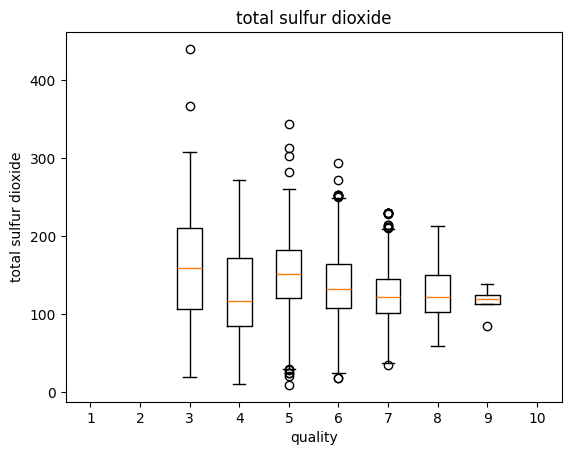

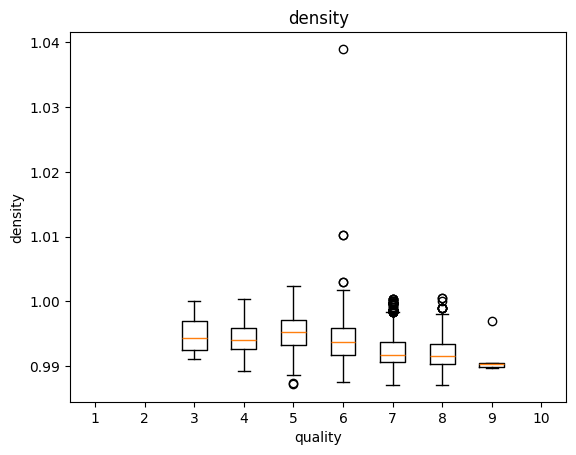

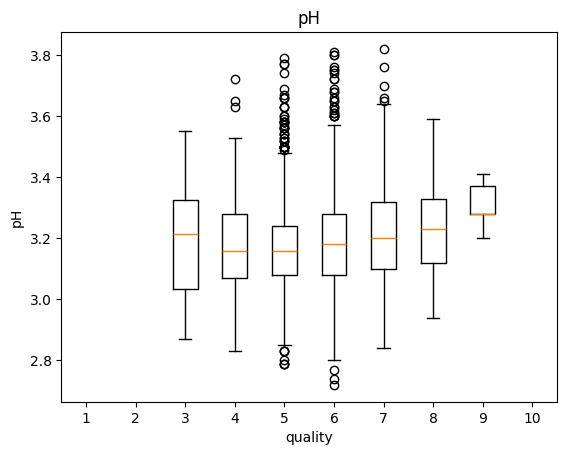

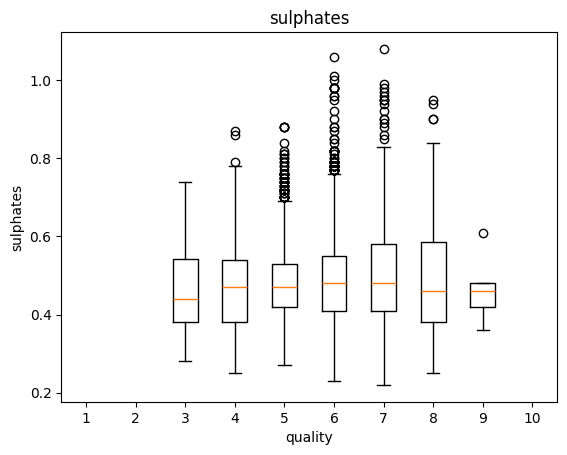

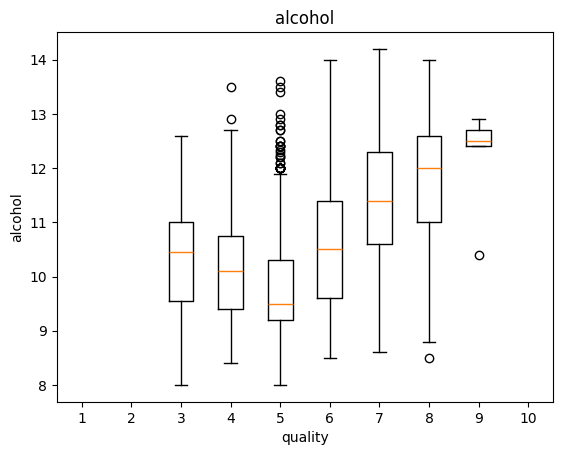

In [7]:
import os

for label in df.columns[:-1]:
  plt.boxplot([df[df['quality']==i][label] for i in range(1,11)])
  plt.title(label)
  plt.xlabel('quality')
  plt.ylabel(label)
  # Create 'imgs' directory if it doesn't exist
  # if not os.path.exists('imgs'):
  #     os.makedirs('imgs')
  plt.savefig('imgs/'+'white'.join(label.split(' ')))
  plt.show()

# **Gathering training and testing data**

In [8]:
bins = [0, 5.5, 7.5, 10]
labels = [0, 1, 2]
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)


In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [10]:
x = df[df.columns[:-1]]
y = df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 42)

In [11]:
for data in [y_train, y_test]:
  print(data.describe())

count     3918
unique       3
top          1
freq      2454
Name: quality, dtype: int64
count     980
unique      3
top         1
freq      624
Name: quality, dtype: int64


# **knn classifier**

In [12]:
n3 = KNeighborsClassifier(n_neighbors=3)
n3.fit(x_train, y_train)
pred_n3 = n3.predict(x_test)
print(classification_report(y_test, pred_n3))

cross_val = cross_val_score(estimator = n3, X = x_train, y = y_train, cv = 10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       321
           1       0.77      0.79      0.78       624
           2       0.39      0.26      0.31        35

    accuracy                           0.72       980
   macro avg       0.60      0.56      0.57       980
weighted avg       0.71      0.72      0.71       980

0.7292016806722689


In [13]:
n3 = KNeighborsClassifier(n_neighbors=5)
n3.fit(x_train, y_train)
pred_n3 = n3.predict(x_test)
print(classification_report(y_test, pred_n3))

cross_val = cross_val_score(estimator = n3, X = x_train, y = y_train, cv = 10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.64      0.59      0.62       321
           1       0.76      0.82      0.79       624
           2       0.33      0.11      0.17        35

    accuracy                           0.72       980
   macro avg       0.58      0.51      0.52       980
weighted avg       0.71      0.72      0.71       980

0.7225618508272874


# **Decision tree classsifier**

In [14]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print(classification_report(y_test, pred_dt))

cross_val = cross_val_score(estimator = dt, X = x_train, y = y_train, cv = 10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.69      0.68      0.68       321
           1       0.81      0.80      0.81       624
           2       0.40      0.49      0.44        35

    accuracy                           0.75       980
   macro avg       0.63      0.66      0.64       980
weighted avg       0.75      0.75      0.75       980

0.7304798006158986


# **Random forest classifier**

In [15]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))
cross_val = cross_val_score(estimator = rf, X = x_train, y = y_train, cv = 10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       321
           1       0.84      0.90      0.87       624
           2       1.00      0.43      0.60        35

    accuracy                           0.82       980
   macro avg       0.87      0.68      0.74       980
weighted avg       0.83      0.82      0.82       980

0.8057642622266299


# **Stochastic gradient descent** minimize loss function

In [16]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)
print(classification_report(y_test, pred_sgd))

cross_val = cross_val_score(estimator = sgd, X = x_train, y = y_train, cv = 10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.62      0.39      0.48       321
           1       0.70      0.88      0.78       624
           2       0.00      0.00      0.00        35

    accuracy                           0.69       980
   macro avg       0.44      0.42      0.42       980
weighted avg       0.65      0.69      0.66       980

0.6980714024740331


# **Trying to improve results**

In [17]:
#number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]

#Number of features to consider at every splits
max_features = ['auto', 'sqrt']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]

#min number of samples reuired to split a node
min_samples_split = [2, 5, 10]

#min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#method of selecting samples for training each tree
bootstrap = [True, False]

#random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_optimized = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_optimized.fit(x_train, y_train)

pred_optimized = rf_optimized.predict(x_test)
print(classification_report(y_test, pred_optimized))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       321
           1       0.83      0.90      0.86       624
           2       0.94      0.43      0.59        35

    accuracy                           0.82       980
   macro avg       0.85      0.68      0.73       980
weighted avg       0.82      0.82      0.82       980



In [18]:
print(classification_report(y_test, pred_optimized))
print(rf_optimized.best_params_)

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       321
           1       0.83      0.90      0.86       624
           2       0.94      0.43      0.59        35

    accuracy                           0.82       980
   macro avg       0.85      0.68      0.73       980
weighted avg       0.82      0.82      0.82       980

{'n_estimators': 261, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 98, 'bootstrap': True}


In [ ]:
rfeval = cross_val_score(estimator = rf_optimized, X = x_train, y = y_train, cv = 10)
print(rfeval.mean())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
73 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
69 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
93 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

0.8047445064982515


In [ ]:
rf_optimized = RandomForestClassifier(n_estimator=50, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=10, bootstrap=False)
rf_optimized.fit(x_train, y_train)

rfeval = cross_val_score(estimator = rf_optimized, X = x_train, y = y_train, cv = 10)
print(rfeval.mean())

TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'n_estimator'